In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
#open csv file
df = pd.read_csv('crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [12]:
#count null values
df.isnull().sum()


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [13]:
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [ ]:
# Convert boolean columns to integers
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], drop_first=True)


KeyError: "None of [Index(['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], dtype='object')] are in the [columns]"

In [ ]:
#scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']] = scaler.fit_transform(df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']])


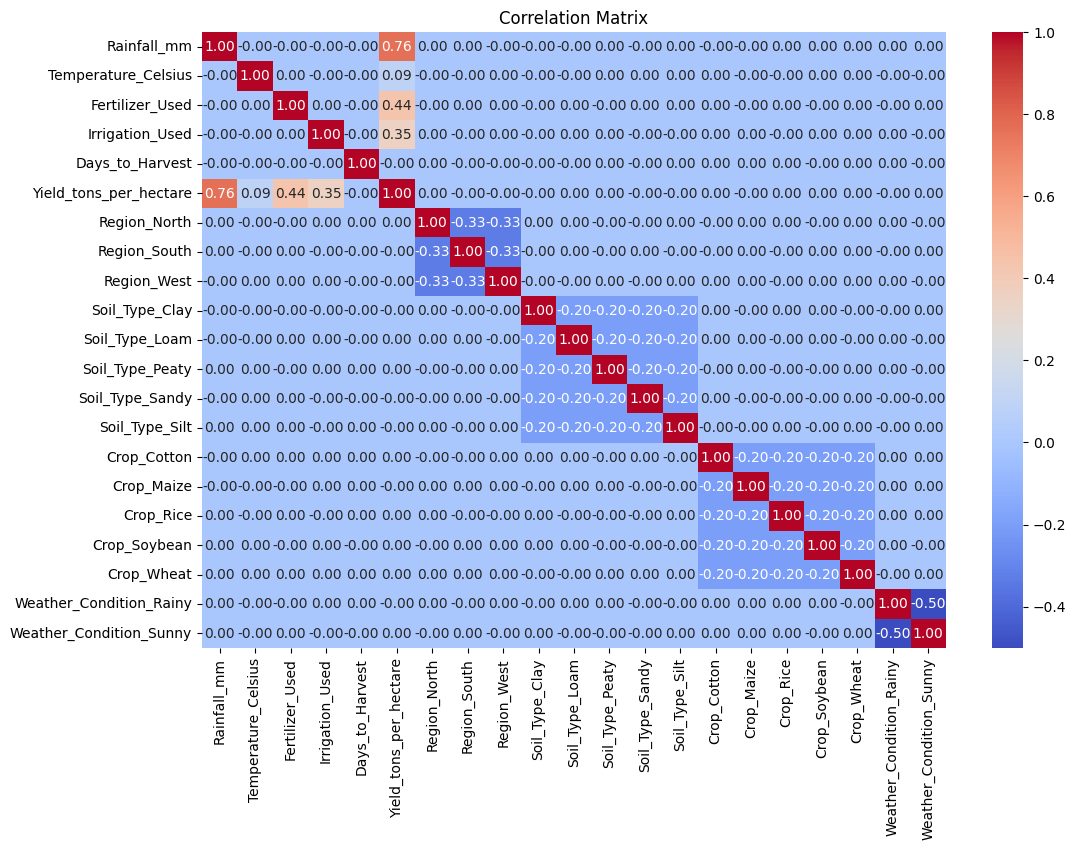

In [17]:
#correlational matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()  


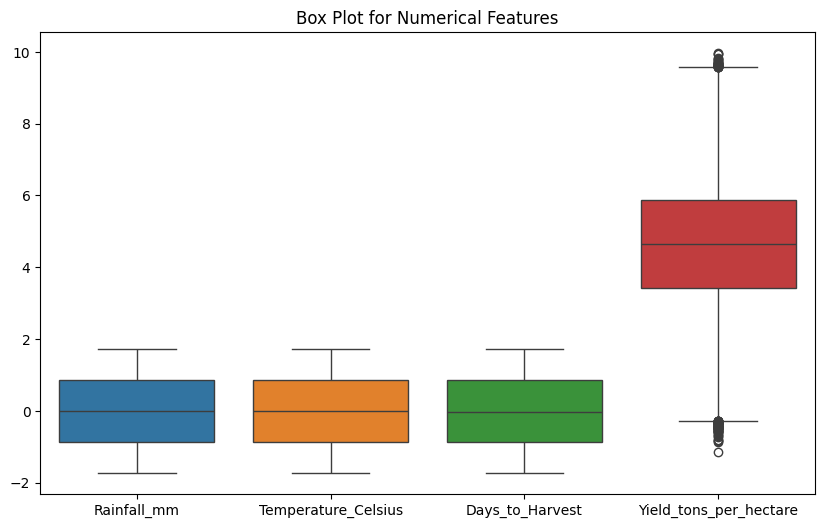

In [19]:
#box plot to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']])
plt.title('Box Plot for Numerical Features')
plt.show()

In [21]:
#handle outliers if any (for simplicity, we'll just clip them here)
for col in ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower_bound, upper_bound)   
    print(f'Clipped {col} to range [{lower_bound}, {upper_bound}]') 
     

Clipped Rainfall_mm to range [-1.6973521593768703, 1.6966452576775959]
Clipped Temperature_Celsius to range [-1.6966919712964612, 1.6962608467894413]
Clipped Days_to_Harvest to range [-1.714419929538974, 1.7148033089909223]


In [23]:
# Split data into features and target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [24]:
# Train a regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [26]:
#model parameters
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_) 

Model Coefficients: [ 1.29914692e+00  1.44030240e-01  1.49941305e+00  1.19921490e+00
  5.23844983e-04  4.69316638e-04 -4.68469680e-04 -7.32975196e-04
  3.17766870e-03  1.91532129e-04  6.81717417e-05  2.74197025e-03
 -1.68860156e-03 -1.74083438e-03 -3.00419179e-03  1.48607842e-03
 -7.27226398e-04 -2.90544058e-03  1.44042058e-03 -2.64386440e-04]
Model Intercept: 3.300547302183733


In [27]:
#Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
    

Mean Absolute Error: 0.39956483717580477
Mean Squared Error: 0.2507896542420694
R^2 Score: 0.9130092666095494


In [28]:
#check underfitting or overfitting
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.9129631739347888
Test Score: 0.9130092666095494


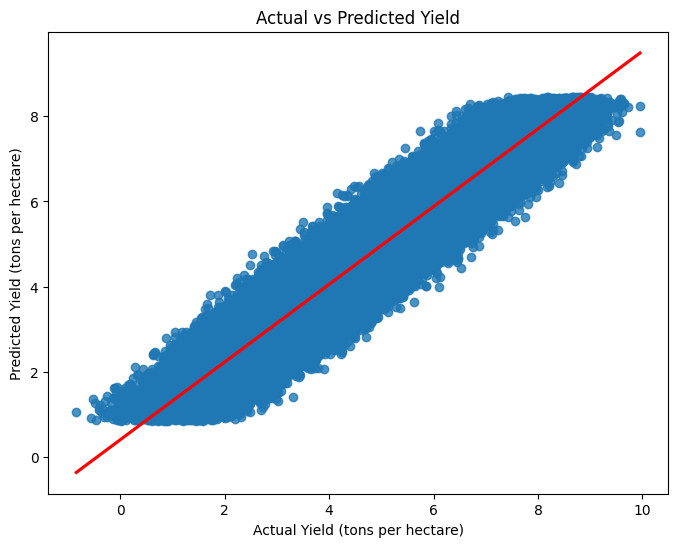

In [29]:
#regplot actual vs predicted

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield (tons per hectare)')
plt.title('Actual vs Predicted Yield')
plt.show()  

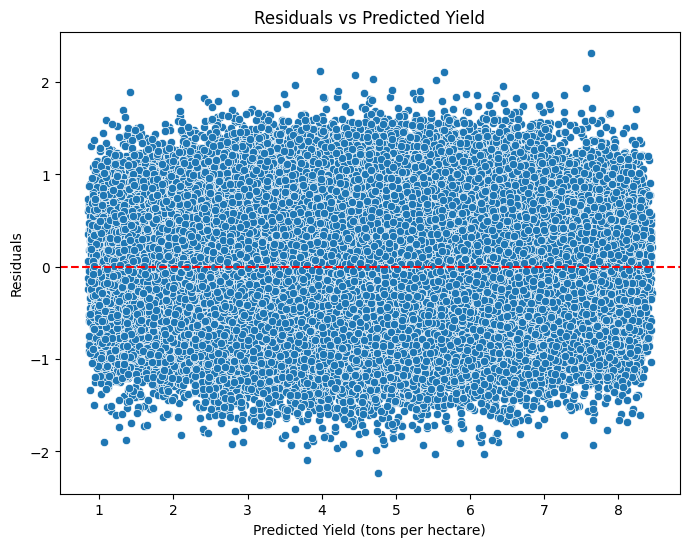

In [31]:
#residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Yield (tons per hectare)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Yield')
plt.show()

In [32]:
# Save the model using pickle
import pickle

# Save the trained model
with open('crop_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as crop_model.pkl")


Model saved as crop_model.pkl


In [33]:
# Save the scaler using pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now train the model with scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl
